In [1]:
TREASURE = 7500
EXP_TREASURE = 9000 # some might have 2

In [2]:
# List of the tiles with their corresponding multipliers and number of hunters
tiles = {
    "G26": (24, 2), "G27": (70, 4), "G28": (41, 3), "G29": (21, 2), "G30": (60, 4),
    "H26": (47, 3), "H27": (82, 5), "H28": (87, 5), "H29": (80, 5), "H30": (35, 3), 
    "I26": (73, 4), "I27": (89, 5), "I28": (100, 8), "I29": (90, 7), "I30": (17, 2),
    "J26": (77, 5), "J27": (83, 5), "J28": (85, 5), "J29": (79, 5), "J30": (55, 4), 
    "K26": (12, 2), "K27": (27, 3), "K28": (52, 4), "K29": (15, 2),  "K30": (30, 3)
}

# Calculate the per hunter reward for each tile
per_hunter_rewards = {tile: (multiplier * EXP_TREASURE / hunters) for tile, (multiplier, hunters) in tiles.items()}
# sort the tiles by the per hunter reward
sorted_tiles = sorted(per_hunter_rewards.items(), key=lambda x: x[1], reverse=True)
sorted_tiles

[('I26', 164250.0),
 ('I27', 160200.0),
 ('G27', 157500.0),
 ('H28', 156600.0),
 ('J28', 153000.0),
 ('J27', 149400.0),
 ('H27', 147600.0),
 ('H29', 144000.0),
 ('J29', 142200.0),
 ('H26', 141000.0),
 ('J26', 138600.0),
 ('G30', 135000.0),
 ('J30', 123750.0),
 ('G28', 123000.0),
 ('K28', 117000.0),
 ('I29', 115714.28571428571),
 ('I28', 112500.0),
 ('G26', 108000.0),
 ('H30', 105000.0),
 ('G29', 94500.0),
 ('K30', 90000.0),
 ('K27', 81000.0),
 ('I30', 76500.0),
 ('K29', 67500.0),
 ('K26', 54000.0)]

In [3]:
# sum the rewards of all the tiles that are above the hurdle
total_reward = sum(reward for tile, reward in sorted_tiles)
total_reward

3057814.285714286

In [4]:
rewards_per_group = total_reward / 9000 # have 3000 group each has 3 selection
rewards_per_group

339.75714285714287

Prove we should take all three chances

Given K26 is the worst choice, assume only us choose K26, then the reward for K26 will be:

12 / (2 + 1) = 4

In [5]:
OTHER_HUNTERS_CHOOSE_K26 = 9
hurdle = 12 / (2 + 1 + OTHER_HUNTERS_CHOOSE_K26)

# Calculate how many extra hunters would reduce the per hunter reward to K26 for each tile
extra_hunters_for_six = {tile: (multiplier / 4) - hunters for tile, (multiplier, hunters) in tiles.items()}

# sort the tiles by the number of extra hunters needed
sorted_extra_hunters = sorted(extra_hunters_for_six.items(), key=lambda x: x[1], reverse=True)
sorted_extra_hunters

[('I27', 17.25),
 ('I28', 17.0),
 ('H28', 16.75),
 ('J28', 16.25),
 ('J27', 15.75),
 ('H27', 15.5),
 ('I29', 15.5),
 ('H29', 15.0),
 ('J29', 14.75),
 ('I26', 14.25),
 ('J26', 14.25),
 ('G27', 13.5),
 ('G30', 11.0),
 ('J30', 9.75),
 ('K28', 9.0),
 ('H26', 8.75),
 ('G28', 7.25),
 ('H30', 5.75),
 ('K30', 4.5),
 ('G26', 4.0),
 ('K27', 3.75),
 ('G29', 3.25),
 ('I30', 2.25),
 ('K29', 1.75),
 ('K26', 1.0)]

In [6]:
# sum the number of extra hunters needed
total_extra_hunters = sum(extra_hunters_for_six.values())
total_extra_hunters

257.75

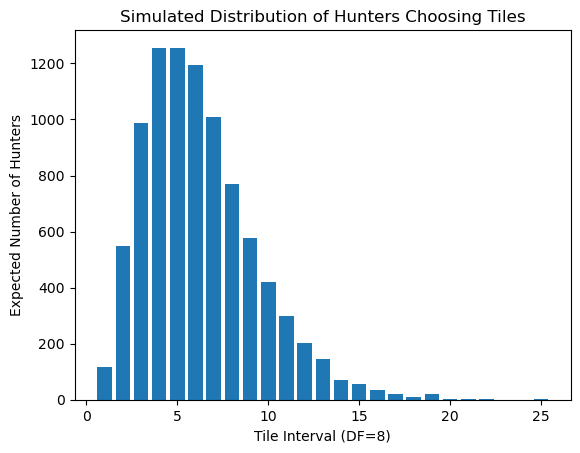

[('I30', 76500.0), ('K29', 67500.0), ('K30', 54000.0)]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# degrees of freedom for the chi-square distribution
DF = 8

# Define the total number of choices (hunters)
total_choices = 9000

# Define the number of intervals (tiles)
intervals = 25

# Create a left-skewed chi-square distribution
# Since the chi-square distribution is right-skewed, we need to transform it.
# One common transformation is to subtract chi-square values from a large number
# to mirror the distribution. To maintain the scale we will later fit the distribution
# within the range of 0 to the total number of hunters.
max_chi_value = chi2.ppf(0.999, df=intervals)  # A high percentile for chi-square values

# Generate chi-square distributed numbers and then transform them to get a left-skewed distribution
chi_values = chi2.rvs(df=DF, size=total_choices)

# Group the values into intervals to simulate the number of hunters choosing each interval (tile)
count_per_interval = np.histogram(chi_values, bins=intervals)[0]

# Calculate the expected frequency for each interval assuming each interval corresponds to a tile
expected_frequency_per_tile = count_per_interval

# Output the expected frequency per tile
expected_frequency_per_tile

# We can also visualize the distribution
plt.bar(range(1, intervals + 1), expected_frequency_per_tile)
plt.xlabel(f'Tile Interval (DF={DF})')
plt.ylabel('Expected Number of Hunters')
plt.title(f'Simulated Distribution of Hunters Choosing Tiles')
plt.show()

# The final expected frequency per tile is in the same order as the sorted_tiles from your analysis
# sorted_tiles had the most desirable tile first, which in our simulation will have the lowest number
# of hunters choosing it due to the left-skewness we introduced.

# Map the tile labels with their expected number of hunters
expected_hunters = {tile: freq for (tile, _), freq in zip(sorted_tiles, expected_frequency_per_tile)}
expected_hunters

# Calculate the expected reward for each tile
expected_rewards = {}
for tile, (multiplier, original_hunters) in tiles.items():
    # Total hunters is the sum of the original hunters and the expected number of additional hunters
    total_hunters = original_hunters + expected_hunters.get(tile, 0)
    # Calculate the expected reward for the tile
    expected_rewards[tile] = (multiplier * EXP_TREASURE) / total_hunters

# Output the expected rewards per tile
expected_rewards_sorted = sorted(expected_rewards.items(), key=lambda item: item[1], reverse=True)



In [26]:
def top_n_tiles_for_chisquare_df(n, df):

    # Define the total number of choices (hunters)
    total_choices = 9000

    # Define the number of intervals (tiles)
    intervals = 25

    # Create a left-skewed chi-square distribution
    # Since the chi-square distribution is right-skewed, we need to transform it.
    # One common transformation is to subtract chi-square values from a large number
    # to mirror the distribution. To maintain the scale we will later fit the distribution
    # within the range of 0 to the total number of hunters.
    max_chi_value = chi2.ppf(0.999, df=intervals)  # A high percentile for chi-square values

    # Generate chi-square distributed numbers and then transform them to get a left-skewed distribution
    chi_values = chi2.rvs(df=DF, size=total_choices)

    # Group the values into intervals to simulate the number of hunters choosing each interval (tile)
    count_per_interval = np.histogram(chi_values, bins=intervals)[0]

    # Calculate the expected frequency for each interval assuming each interval corresponds to a tile
    expected_frequency_per_tile = count_per_interval

    # Output the expected frequency per tile
    expected_frequency_per_tile

    # # We can also visualize the distribution
    # plt.bar(range(1, intervals + 1), expected_frequency_per_tile)
    # plt.xlabel(f'Tile Interval (DF={df})')
    # plt.ylabel('Expected Number of Hunters')
    # plt.title(f'Simulated Distribution of Hunters Choosing Tiles')
    # plt.show()

    # The final expected frequency per tile is in the same order as the sorted_tiles from your analysis
    # sorted_tiles had the most desirable tile first, which in our simulation will have the lowest number
    # of hunters choosing it due to the left-skewness we introduced.

    # Map the tile labels with their expected number of hunters
    expected_hunters = {tile: freq for (tile, _), freq in zip(sorted_tiles, expected_frequency_per_tile)}
    expected_hunters

    # Calculate the expected reward for each tile
    expected_rewards = {}
    for tile, (multiplier, original_hunters) in tiles.items():
        # Total hunters is the sum of the original hunters and the expected number of additional hunters
        total_hunters = original_hunters + expected_hunters.get(tile, 0)
        # Calculate the expected reward for the tile
        expected_rewards[tile] = (multiplier * EXP_TREASURE) / total_hunters

    # Output the expected rewards per tile
    expected_rewards_sorted = sorted(expected_rewards.items(), key=lambda item: item[1], reverse=True)
    # print only the keys of top n tiles
    print([tile for tile, reward in expected_rewards_sorted[:n]])

for df in range(1, 20):
    print(f"DF={df}")
    top_n_tiles_for_chisquare_df(5, df)
    print("\n\n")

DF=1
['K29', 'K30', 'K27', 'I30', 'K26']



DF=2
['K29', 'K27', 'K26', 'K30', 'G29']



DF=3
['K29', 'K27', 'K26', 'K30', 'I28']



DF=4
['I30', 'K27', 'K30', 'K26', 'I28']



DF=5
['I30', 'K29', 'K27', 'K30', 'G29']



DF=6
['I30', 'K29', 'K27', 'I28', 'H30']



DF=7
['I30', 'K27', 'K29', 'K30', 'K26']



DF=8
['K27', 'I30', 'K29', 'K30', 'H30']



DF=9
['I30', 'K27', 'K29', 'K30', 'I28']



DF=10
['K29', 'K30', 'K27', 'I30', 'I28']



DF=11
['K26', 'K29', 'I30', 'K27', 'K30']



DF=12
['K30', 'K29', 'I30', 'K27', 'I28']



DF=13
['K29', 'K30', 'G29', 'I30', 'K27']



DF=14
['K27', 'H30', 'K29', 'K30', 'G29']



DF=15
['K30', 'K27', 'I30', 'K29', 'I28']



DF=16
['K29', 'K27', 'K30', 'G29', 'H30']



DF=17
['K29', 'I30', 'K26', 'K30', 'K27']



DF=18
['K30', 'K27', 'I30', 'K26', 'K29']



DF=19
['I30', 'K30', 'K27', 'K29', 'G29']



